# Clustering - Mall Customers Segmentation

### ----------------------------------------------------------------------------------------------------------------------------------

## Overview of Mall customers Segmentation project

Customers who come for shopping in a mall can be grouped in a number of ways. Shopping pattern,
spending pattern, shopping score, salary etc are some of the factors that can be used to divide the
customers into different categories.

The reason for these clusters is to help identify those customers who would be interested in certain
products, offers and services. The store may strategize its offerings in such a way that it targets only
right customers for specific products. This helps in creating a win-win situation for both the store (in
terms of revenue and more customers through customer recommendation) and the customer
(discounts, offers, reward points, gifts, etc).

### Business Objective

To create customer cluster to identify the different types of customers.

### Technical Goals
Understand the data very well. Do all transformations / data engineering / etc. wherever applicable

Perform Exploratory Data Analysis (EDA)

Carry out all the Data mining tasks

Identify the salient features that will determine the best results

Perform the model evaluation to select the best algorithms

### ----------------------------------------------------------------------------------------------------------------------------------

#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn import metrics
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

#### Load the data

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')

#### Insights from data

In [3]:
# Checking first five records from data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Checking last five records from data
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
# Checking random five sample from data
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
62,63,Female,67,47,52
45,46,Female,24,39,65
122,123,Female,40,69,58
35,36,Female,21,33,81
176,177,Male,58,88,15


#### Checking the structure of data

In [6]:
df.shape

(200, 5)

#### Summary the data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


#### Information from data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### Null value check

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### There is no null value in the dataset.

#### Checking the correlation

In [10]:
cor=df.corr()
cor

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


### Exploratory Data Analysis 

* Doing EDA to understand more about data and get useful insights from data.

####  1) What is the ratio of Gender?

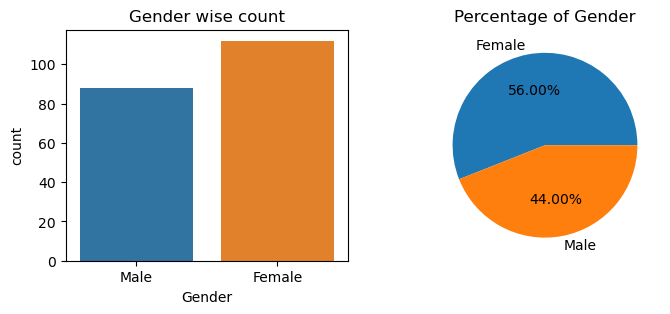

In [11]:
fig,ax=plt.subplots(1,2 ,figsize=(8,3))
ax[0].set_title('Gender wise count')
ax[1].set_title('Percentage of Gender')
percentage=df['Gender'].value_counts()

sns.countplot(x=df['Gender'],ax=ax[0])
plt.pie(percentage,labels=percentage.index,autopct='%0.2f%%')
plt.show()

* From the visualization above is the ratio and count of Gender:
* We can see thay females customers are maximum in shopping comparatively to Males.
* Which is 56%.

####  2) What is the Distribution of annual salary?

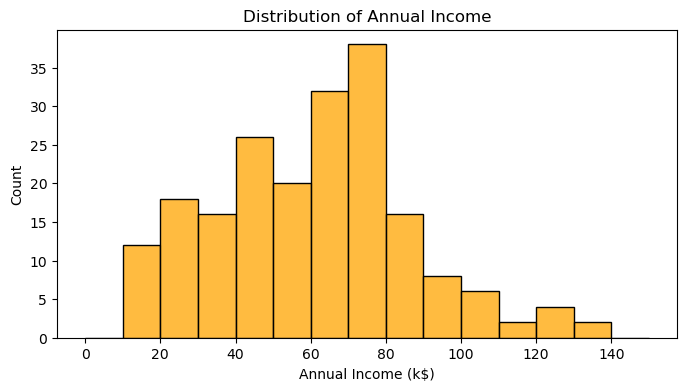

In [12]:
fig,ax=plt.subplots(figsize=(8,4))
bins=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]
sns.histplot(df['Annual Income (k$)'],bins=bins,ax=ax,color='orange')
ax.set_title('Distribution of Annual Income')
plt.show()

* From visualization above is the Distribution of Annual Income of customers.
* Maximum number of customers are distributed between 40 to 80 . So Annual income of this type customers are showing more interest in shopping.
* And the customers with annual income lessthan 40 and greater than 80 are minimum.

####  3) What is the Distribution of Spending score?

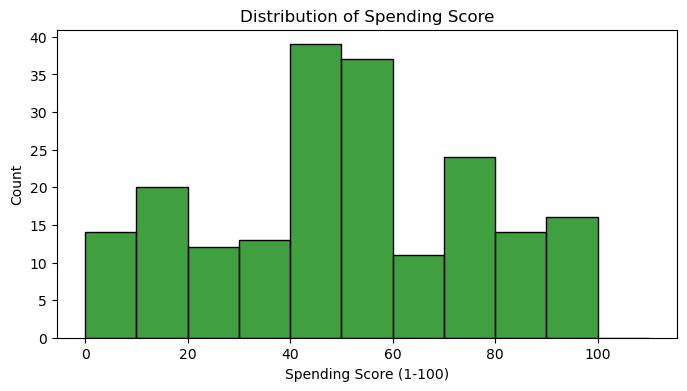

In [13]:
fig,ax=plt.subplots(figsize=(8,4))
bins=[0,10,20,30,40,50,60,70,80,90,100,110]
sns.histplot(df['Spending Score (1-100)'],bins=bins,ax=ax,color='green')
ax.set_title('Distribution of Spending Score')
plt.show()

* From visualization above is the Distribution of Spending Score of customers:
* Maximum number of customers are distributed between 40 to 60.

#### 4)What is the Correlation of Annual income and Spending score?

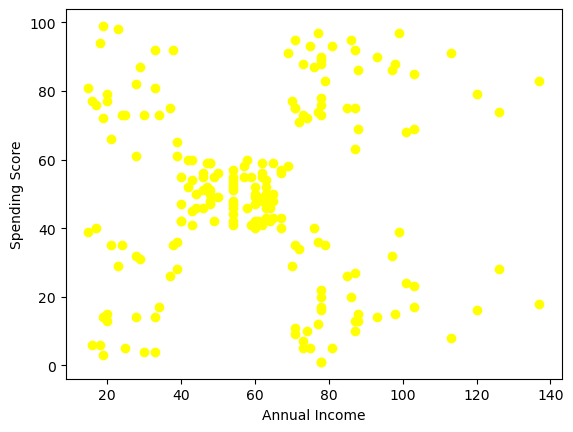

In [14]:
plt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

* From visualization above the Scatter plot of Annual income and Spending score:
* Customers whose annual income is 20-40 and 80-100 have the maximum shopping rate and spending score.
* Customers whose annual income is 40-80 are stable customers they are not having maximum and minimum spending score they are constant.

#### 5)What is the distribution of Age?

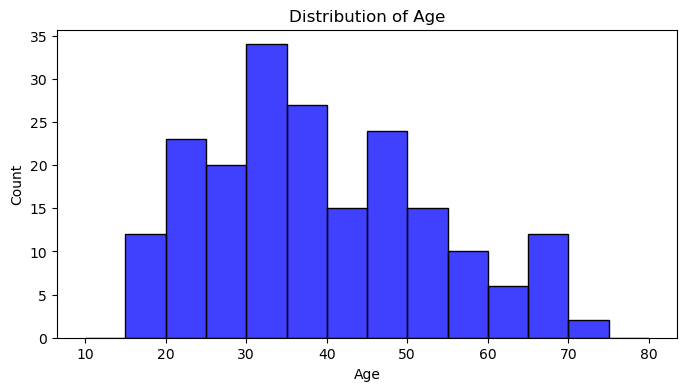

In [15]:
fig,ax=plt.subplots(figsize=(8,4))
bins=[10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
sns.histplot(df['Age'],bins=bins,ax=ax,color='blue')
ax.set_title('Distribution of Age')
plt.show()

* From visualization above is the distribution of Age:
* Customers with age group of 25-40 are maximum in shopping.
* customers with age group of below 20 and above 55 are minimum in shopping.

#### Encoding

In [16]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [17]:
X=df[['Annual Income (k$)','Spending Score (1-100)']]

In [18]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### Clustering using KMeans :

Find a good K for the model using a for loop and score and train this model.

#### Using Elbow method

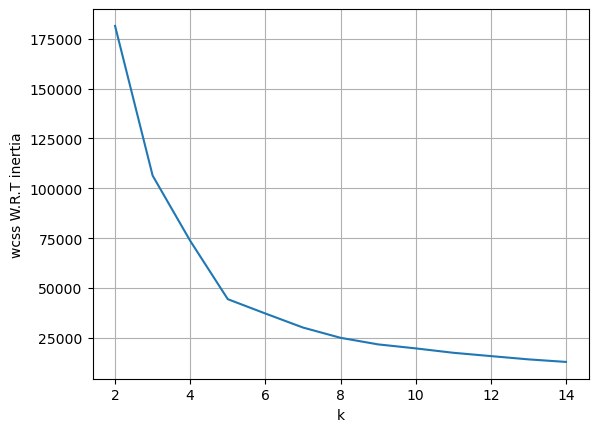

In [19]:
wcss=[]
for k in range(2,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,15),wcss)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('wcss W.R.T inertia')
plt.show()

#### using Silhouette score

In [20]:
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = range(2,12)
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395
For n_clusters = 8 The average silhouette_score is : 0.4572211842776841
For n_clusters = 9 The average silhouette_score is : 0.45872989167156364
For n_clusters = 10 The average silhouette_score is : 0.4467356774401869
For n_clusters = 11 The average silhouette_score is : 0.42983405632843386


### Model building using best K value

In [21]:
kmeans=KMeans(n_clusters=5)

In [22]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [23]:
labels=kmeans.fit_predict(X)
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### Visualization

Silhouette Coefficient: 0.554


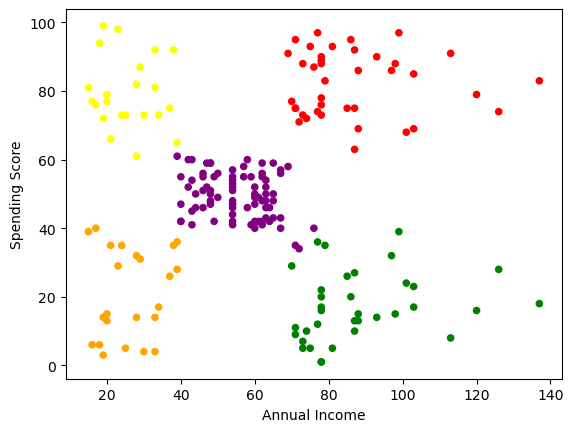

In [24]:
colors=['purple','red','blue','green','orange','yellow']
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels,cmap=matplotlib.colors.ListedColormap(colors),s=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

#### Summary of Kmeans clustering:
* Above model is Kmeans clustering.
* K values (n_clusters) are choosen on the basis of Elbow method and silhouette score.
* From both Elbow and Silhouette score , Best K value obtained is 5.
* In Elbow the sharp descrease happen where k =5 and in silhouette score we got highest when k=5.
* Model building and fitting with n_cluster = 5.
* And predicting(labels) using model.
* Ploting the scatter with obtained labels along with model silhouette score.
* Performance of the model is best .

### Clustering using Hierarchical :

* choosing the best K values  using Dendrogram

In [25]:
from scipy.cluster.hierarchy import dendrogram,linkage

#### Ploting Dendrgram

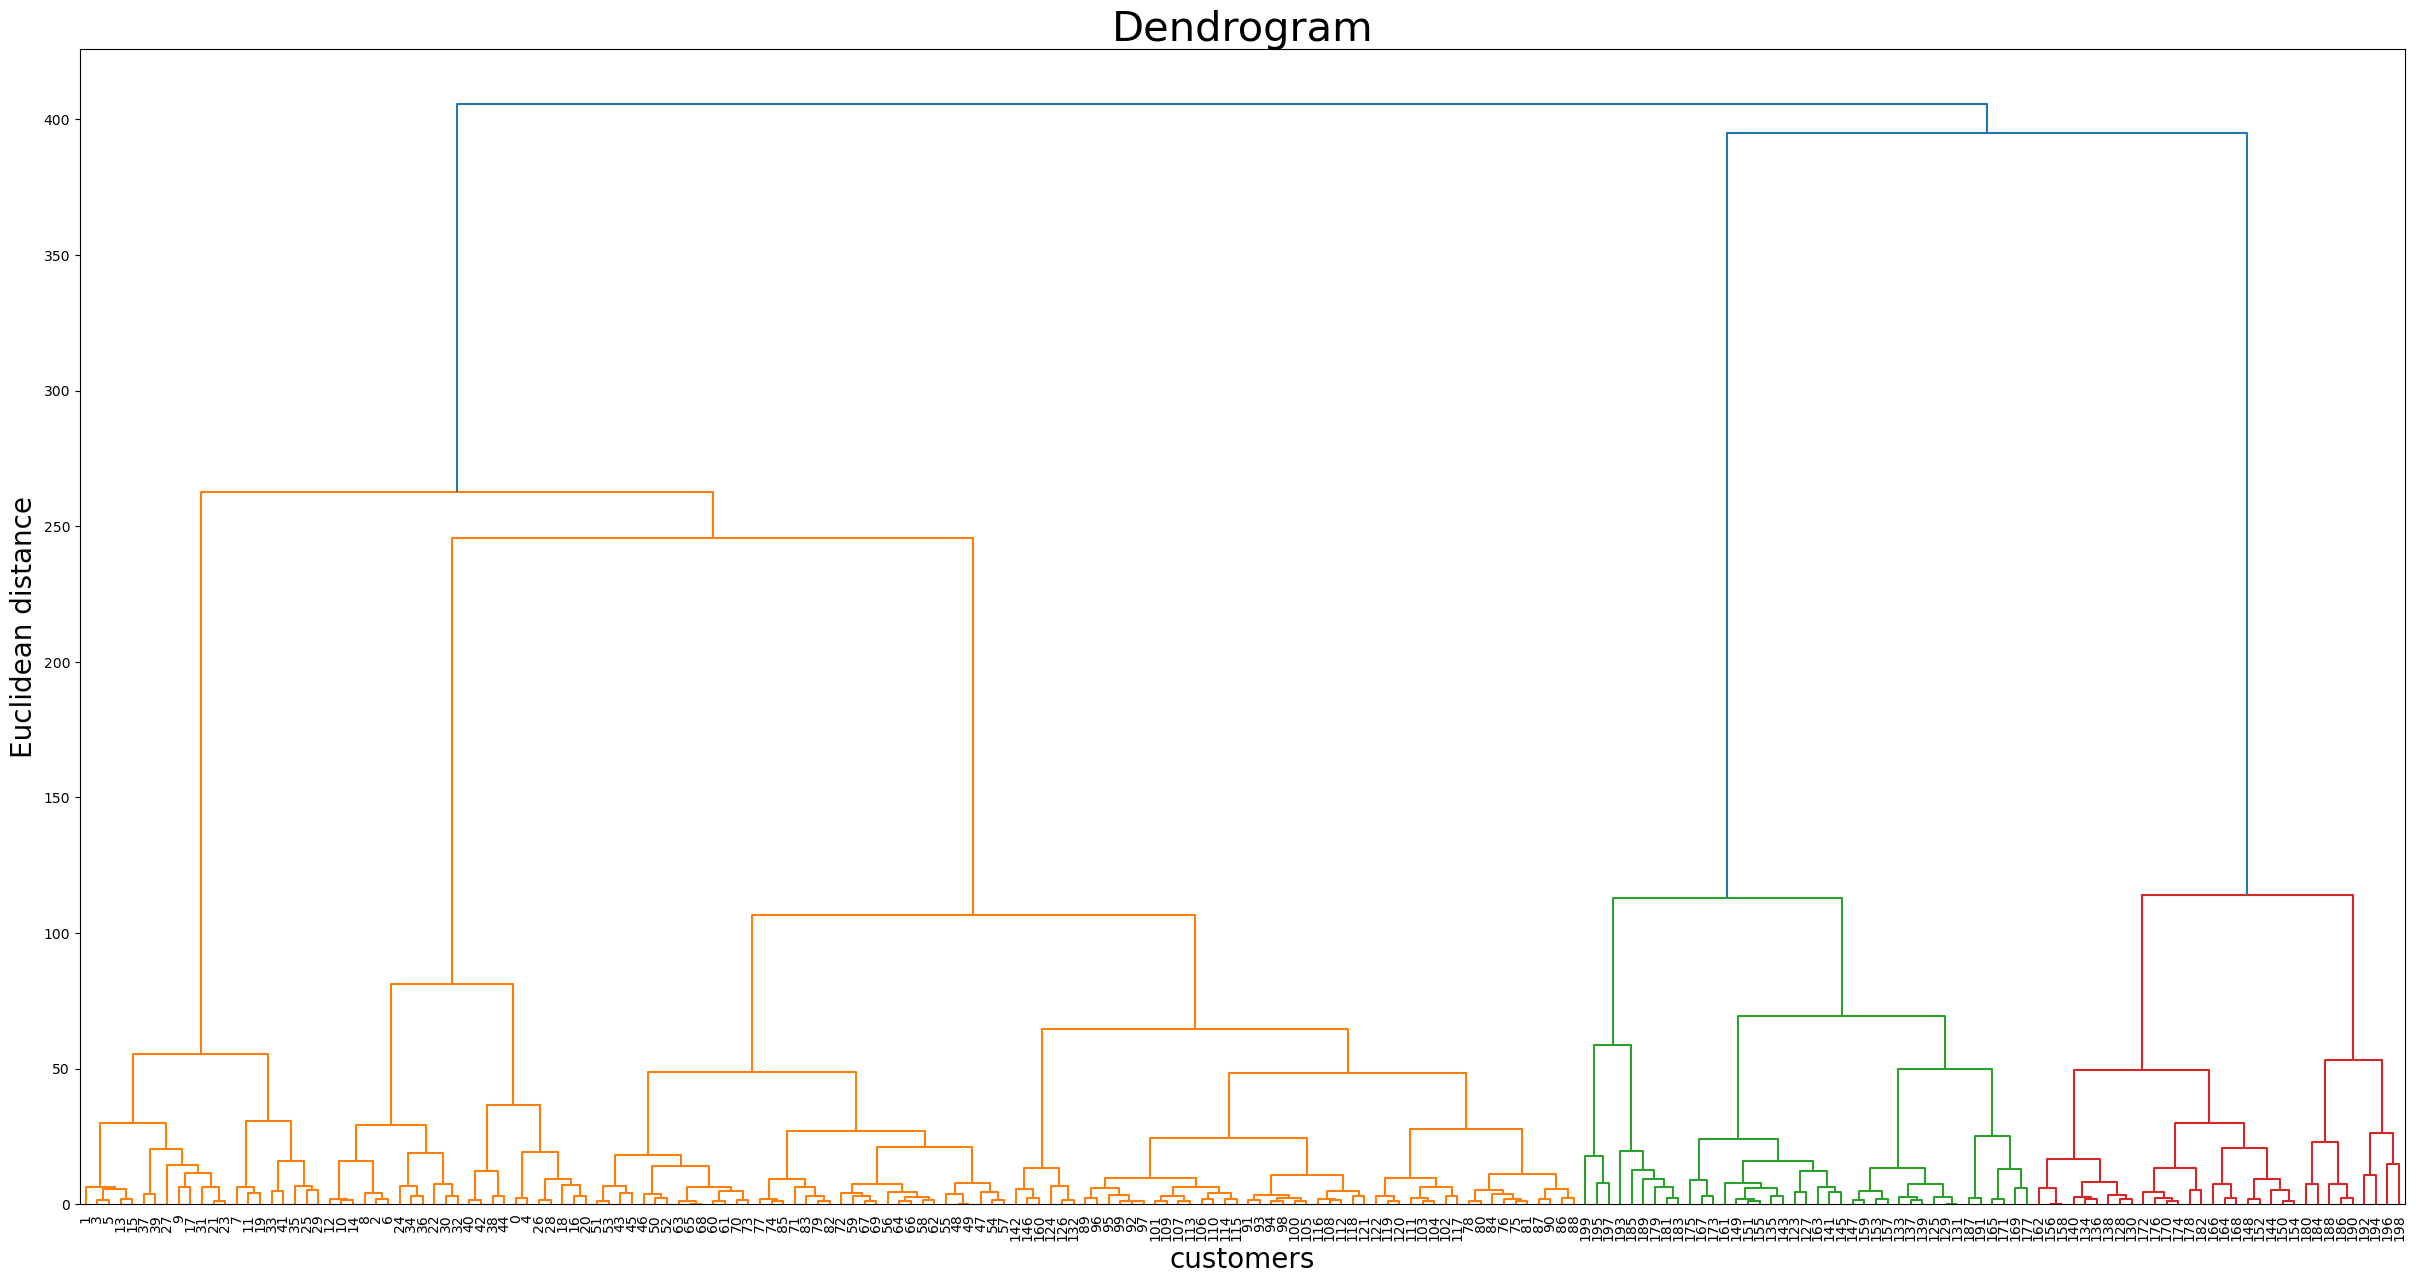

In [26]:
plt.figure(figsize=(30, 15))
dendrogrm = dendrogram(linkage(X, method = 'ward'),labels=X.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

#### Threshold cut = 240

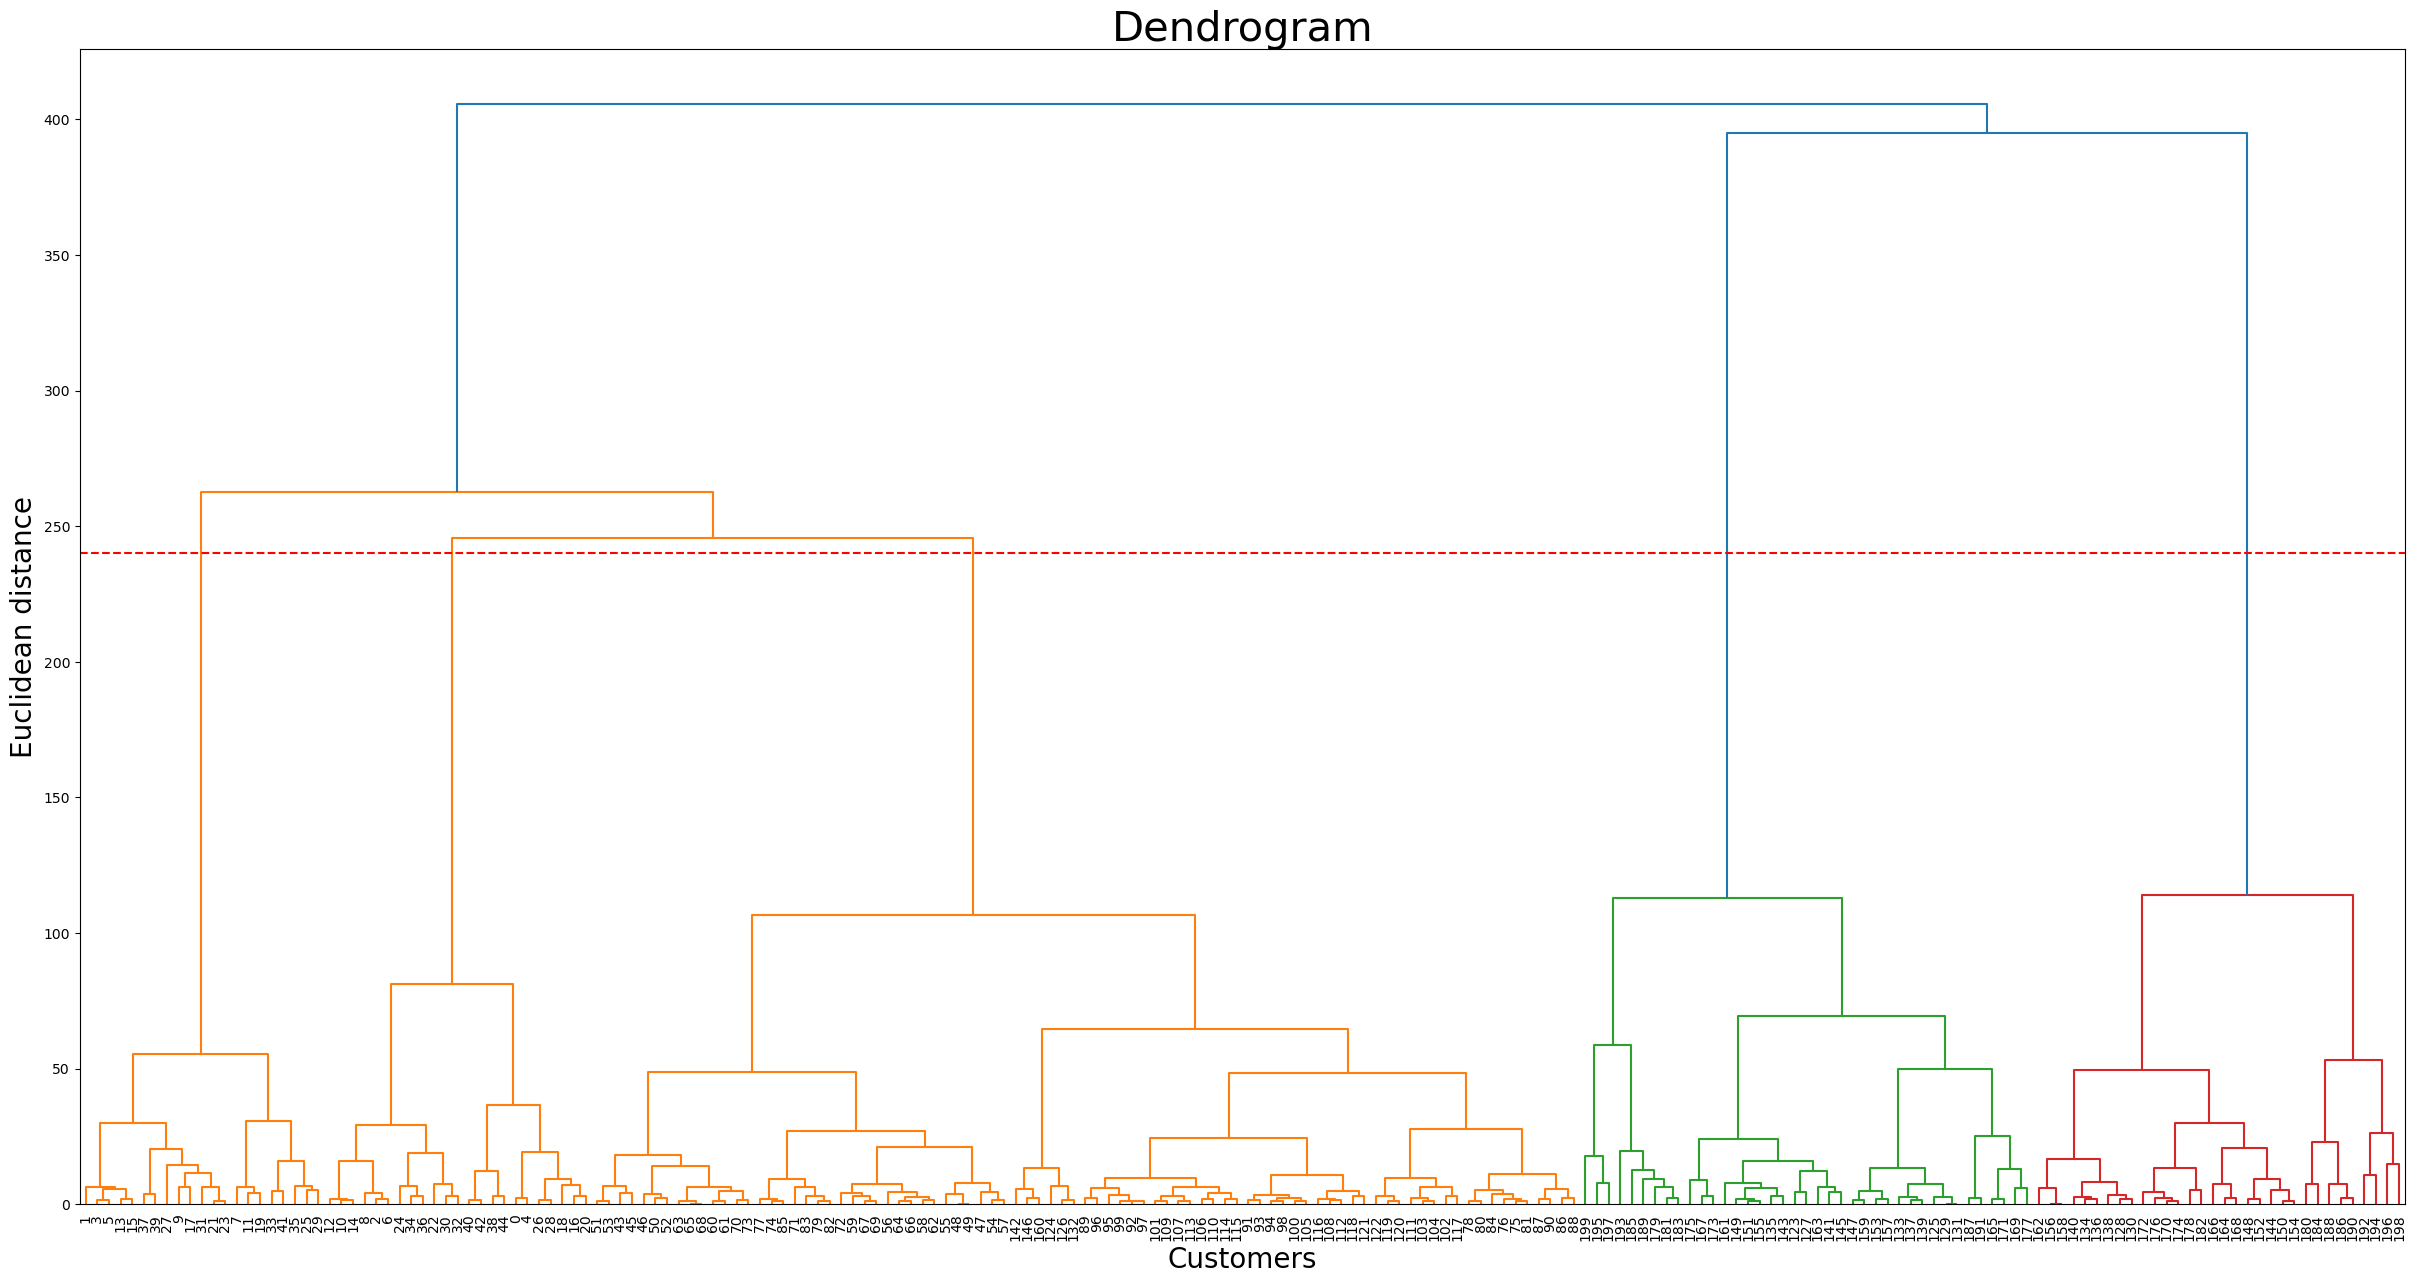

In [27]:
plt.figure(figsize=(30, 15))
dendrogrm = dendrogram(linkage(X, method = 'ward'),labels=X.index)
plt.axhline(y=240, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

#### K value obtained from dendrogram using thresholdcut is 5.

### Building model using best K value

In [28]:
agg=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [29]:
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [30]:
labels=agg.fit_predict(X)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

#### Visualization

Silhouette Coefficient: 0.553


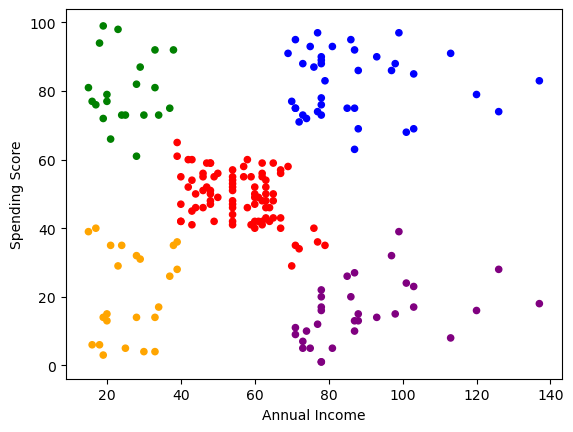

In [31]:
colors=['purple','red','blue','green','orange']
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels,cmap=matplotlib.colors.ListedColormap(colors),s=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

#### Summary of Hierarchical clustering :
* Above model is Hierarchical clustering (Agglomerative) which is nothing but Bottomup approch.
* K values (n_clusters) are choosen on the basis of Dendrogram plotted.
* K value optained is 5.
* Modle builded using K values as 5 , affinity as euclidean, and with Ward linkage.
* Fitting to model and predicting(labels) using model
* Ploting the scatter with obtained labels along with model silhouette score.
* Performance of the model is best and very near to Kmeans model.

### Clustering using DBSCAN :

#### Finding Hyperparameters like Eps value and Min_Sample

In [32]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(X)
distances,index=nbrs.kneighbors(X)

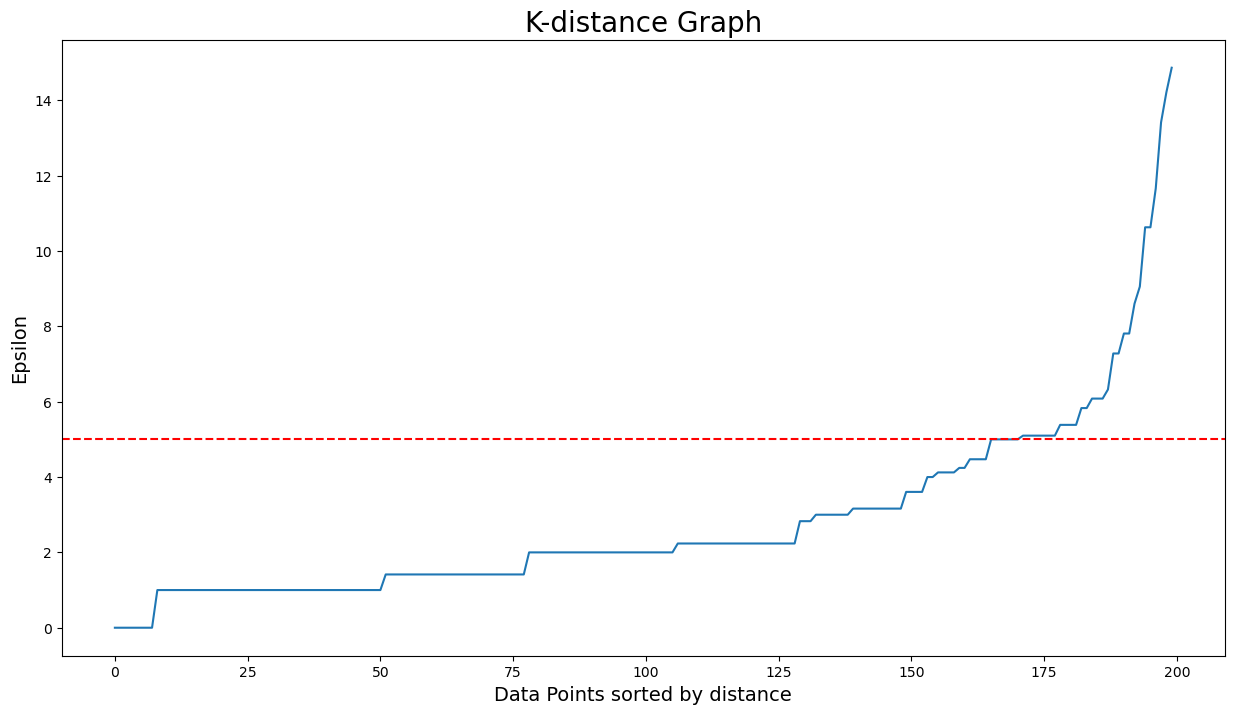

In [33]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

#### #Epsilon value from the K-Distance graph is 11.

#### Find the optimum value of min_sample hyperparameter by setting that evaluated value of eps.

In [34]:
eps=5
for min_samples in [3,4,5,6,7,8,9]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)
    print()

eps= 5 | min_samples=  3 | obtained clustering:  [(1, 55), (2, 3), (3, 6), (4, 3), (5, 4), (6, 5), (7, 3), (8, 79), (9, 11), (10, 10), (11, 14), (12, 3), (13, 4)]

eps= 5 | min_samples=  4 | obtained clustering:  [(1, 76), (2, 6), (3, 79), (4, 10), (5, 10), (6, 11), (7, 4), (8, 4)]

eps= 5 | min_samples=  5 | obtained clustering:  [(1, 87), (2, 6), (3, 78), (4, 10), (5, 9), (6, 10)]

eps= 5 | min_samples=  6 | obtained clustering:  [(1, 100), (2, 76), (3, 10), (4, 6), (5, 8)]

eps= 5 | min_samples=  7 | obtained clustering:  [(1, 116), (2, 76), (3, 8)]

eps= 5 | min_samples=  8 | obtained clustering:  [(1, 120), (2, 72), (3, 8)]

eps= 5 | min_samples=  9 | obtained clustering:  [(1, 129), (2, 71)]



### Building model using optimum epsilon value and min_samples

In [35]:
dbscan=DBSCAN(eps=5,min_samples=6)
dbscan.fit(X)

DBSCAN(eps=5, min_samples=6)

In [36]:
labels=dbscan.fit_predict(X)
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1, -1,  1, -1, -1,  2,  1,  2,  1, -1,  1,  2,  3,
        2,  1,  2,  1,  2,  3, -1,  3, -1, -1, -1,  1, -1,  3, -1,  3, -1,
        1, -1,  3, -1,  1, -1,  1, -1,  3, -1,  3, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

#### Visualization

Silhouette Coefficient: 0.064


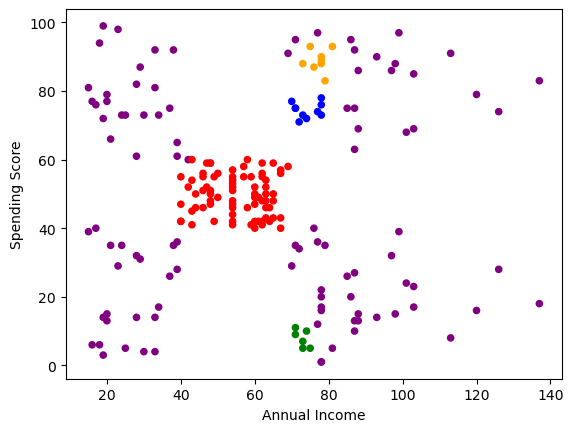

In [37]:
colors=['purple','red','blue','green','orange']
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], c=labels,cmap=matplotlib.colors.ListedColormap(colors),s=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

#### Summary of DBSCAN clustering: 
* Above model is DBSCAN (Density based model).
* For DBscan we find the Optinum epsilon value and min_sample values.
* From k-distance graph best optimum Epsilon value is 5.
* And Min_Sample is obtained hyperparameter by setting that evaluated value of eps, which is 6.
* Building model with optimum hyperparameters like Epsilon value and min_Sample.
* Fitting to model and predicting(labels) using model.
* Ploting the scatter with obtained labels along with model silhouette score.
* From the we can easily say that DBscan is not performing that good for this dataset because data is not densed.
* Performance of the model is poor.

### Best Models:

* `Best model for this shopping mall customers is KMeans clustering and hierarchical clustering`
* Kmeans clustering and Hierarchical  is performed better to other clustering model.
* `Group of cluster and silhouette score of kmeans and hierarchical is best that we can see from visualization.`
* Now grouping the customer using that best models.

### Now grouping the customer using that best models :

#### Using Kmeans clustering model (best model)

In [38]:
kmeans=KMeans(n_clusters=5)

In [39]:
kmeans.fit(X)

KMeans(n_clusters=5)

In [40]:
labels=kmeans.fit_predict(X)
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### visualization and giving name for groups :

In [41]:
X=X.values

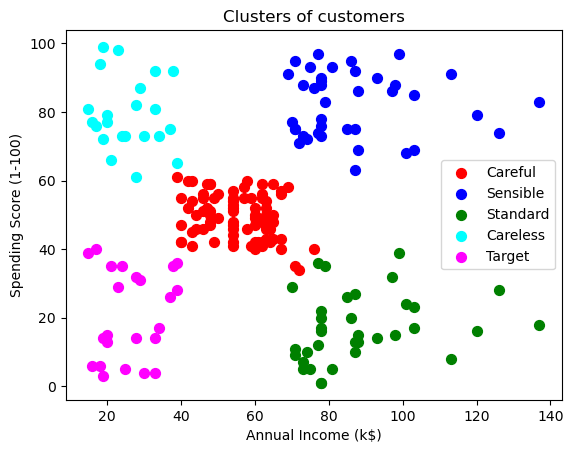

In [43]:
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 50, c = 'blue', label = 'Sensible')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 50, c = 'green', label = 'Standard')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s = 50, c = 'magenta', label = 'Target')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### using Hierarchical clustering:

In [44]:
agg=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [45]:
agg.fit(X)

AgglomerativeClustering(n_clusters=5)

In [46]:
y_hc=agg.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

#### Visualization and grouping customers by giving names:

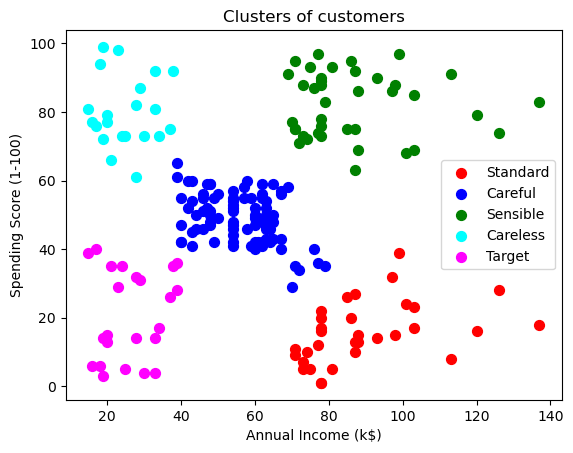

In [48]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Standard')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Careful')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Sensible')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Target')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Conclusion :

* Main intention of this project is to build a best Clustering model to Group the customers of shopping mall.
* For building Clustering model of this project, i have used some Clustering algorithms like
    * Kmeans clustering
    * Hierarchical clustering
    * Density based clustering
* And understanding the data by doing Data preprocessing and Exploratory Data Analysis.
* Building different clustering model with different parameters.
* `Best model is choosen by ploting scatter plot along with Silhouette score.`
* `KMeans and Hierarchical model is performing best.`
* `Grouping the Customers with best models and given names.`